Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [15]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 2.00.
Removido  {76%} suciedad vehiculo => Vehiculo-3 
Llega vehiculo: Vehiculo-7 a la hora 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Llega vehiculo: Vehiculo-8 a la hora 10.00.
Llega vehiculo: Vehiculo-9 a la hora 11.00.
Removido  {65%} suciedad vehiculo => Vehiculo-1 
Removido  {75%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-1] lavado a las 12.00.
Vehiculo [Vehiculo-2] lavado a las 12.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Remo

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
68
Llega vehiculo: Automovil-3 a la hora 7.00.
Removido  {87%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {67%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
49

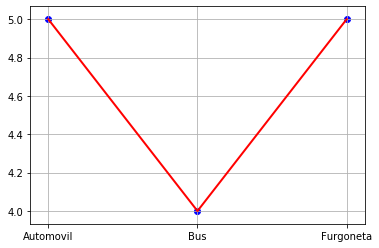

In [40]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

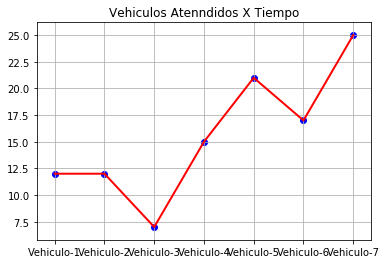

In [16]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
68
Llega vehiculo: Automovil-3 a la hora 7.00.
Removido  {87%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {67%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
49

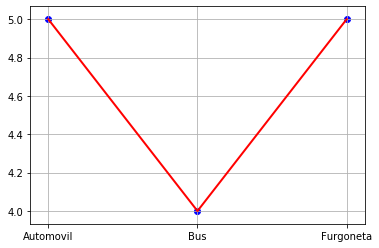

In [40]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Simulacion diagnostico y atencion de pacientes por COVID 19
Llega un nuevo paciente 0
Llega un nuevo paciente 1
Llega un nuevo paciente 2
Llega un nuevo paciente 3
Llega un nuevo paciente 4
Llega un nuevo paciente 5
Llega un nuevo paciente 6
Llega un nuevo paciente 7
Llega un nuevo paciente 8
Llega un nuevo paciente 9
Llega un nuevo paciente 10
Llega un nuevo paciente 11
Llega un nuevo paciente 12
Llega un nuevo paciente 13
Llega un nuevo paciente 14
Llega un nuevo paciente 15
Llega un nuevo paciente 16
Llega un nuevo paciente 17
Llega un nuevo paciente 18
Llega un nuevo paciente 19
Llega un nuevo paciente 20
Llega un nuevo paciente 21
Llega un nuevo paciente 22
Llega un nuevo paciente 23
Llega un nuevo paciente 24
Llega un nuevo paciente 25
Llega un nuevo paciente 26
Llega un nuevo paciente 27
Llega un nuevo paciente 28
Llega un nuevo paciente 29
Llega un nuevo paciente 30
Llega un nuevo paciente 31
Llega un nuevo paciente 32
Llega un nuevo paciente 33
Llega un nuevo paciente 34
Llega

Al paciente 55  se le asigna una CAMA para ser tratado
El paciente ingresa a consulta en 11 minutos
El paciente 38 no ha sido diagnosticado con COVID-19
Al paciente 56  se le asigna una CAMA para ser tratado
El paciente ingresa a consulta en 6 minutos
El paciente 50 no ha sido diagnosticado con COVID-19
Al paciente 57  se le asigna una CAMA para ser tratado
El paciente ingresa a consulta en 5 minutos
Al paciente 52  se le asigna una CAMA   hospital  Liborio Panchana Sotomayor
El paciente ingresa a consulta en 11 minutos
El paciente 41 no ha sido diagnosticado con COVID-19
Al paciente 58  se le asigna una CAMA para ser tratado
El paciente ingresa a consulta en 16 minutos
Al paciente 35  se le asigna una CAMA   hospital  Liborio Panchana Sotomayor
El paciente ingresa a consulta en 8 minutos
El paciente 48 no ha sido diagnosticado con COVID-19
Al paciente 59  se le asigna una CAMA para ser tratado
El paciente ingresa a consulta en 7 minutos
El paciente 49 no ha sido diagnosticado con COVI

El paciente  408 esperó 1 día(s) y fallece, por falta de atención
El paciente  409 esperó 1 día(s) y fallece, por falta de atención
El paciente  410 esperó 1 día(s) y fallece, por falta de atención
El paciente  412 esperó 1 día(s) y fallece, por falta de atención
El paciente  413 esperó 1 día(s) y fallece, por falta de atención
El paciente  416 esperó 1 día(s) y fallece, por falta de atención
El paciente  417 esperó 1 día(s) y fallece, por falta de atención
El paciente  418 esperó 1 día(s) y fallece, por falta de atención
El paciente  420 esperó 1 día(s) y fallece, por falta de atención
El paciente  421 esperó 1 día(s) y fallece, por falta de atención
El paciente  422 esperó 1 día(s) y fallece, por falta de atención
El paciente  423 esperó 1 día(s) y fallece, por falta de atención
El paciente  426 esperó 1 día(s) y fallece, por falta de atención
El paciente  430 esperó 1 día(s) y fallece, por falta de atención
El paciente  432 esperó 1 día(s) y fallece, por falta de atención
El pacient

El paciente  177 esperó 2 día(s) y fallece, por falta de atención
El paciente  180 esperó 2 día(s) y fallece, por falta de atención
El paciente  181 esperó 2 día(s) y fallece, por falta de atención
El paciente  182 esperó 2 día(s) y fallece, por falta de atención
El paciente  186 esperó 2 día(s) y fallece, por falta de atención
El paciente  187 esperó 2 día(s) y fallece, por falta de atención
El paciente  189 esperó 2 día(s) y fallece, por falta de atención
El paciente  190 esperó 2 día(s) y fallece, por falta de atención
El paciente  191 esperó 2 día(s) y fallece, por falta de atención
El paciente  192 esperó 2 día(s) y fallece, por falta de atención
El paciente  193 esperó 2 día(s) y fallece, por falta de atención
El paciente  195 esperó 2 día(s) y fallece, por falta de atención
El paciente  196 esperó 2 día(s) y fallece, por falta de atención
El paciente  198 esperó 2 día(s) y fallece, por falta de atención
El paciente  201 esperó 2 día(s) y fallece, por falta de atención
El pacient

El paciente  536 esperó 2 día(s) y fallece, por falta de atención
El paciente  540 esperó 2 día(s) y fallece, por falta de atención
El paciente  542 esperó 2 día(s) y fallece, por falta de atención
El paciente  543 esperó 2 día(s) y fallece, por falta de atención
El paciente  546 esperó 2 día(s) y fallece, por falta de atención
El paciente  547 esperó 2 día(s) y fallece, por falta de atención
El paciente  548 esperó 2 día(s) y fallece, por falta de atención
El paciente  550 esperó 2 día(s) y fallece, por falta de atención
El paciente  551 esperó 2 día(s) y fallece, por falta de atención
El paciente  555 esperó 2 día(s) y fallece, por falta de atención
El paciente  557 esperó 2 día(s) y fallece, por falta de atención
El paciente  561 esperó 2 día(s) y fallece, por falta de atención
El paciente  563 esperó 2 día(s) y fallece, por falta de atención
El paciente  564 esperó 2 día(s) y fallece, por falta de atención
El paciente  565 esperó 2 día(s) y fallece, por falta de atención
El pacient

Llega un nuevo paciente 872
Llega un nuevo paciente 873
Llega un nuevo paciente 874
Llega un nuevo paciente 875
Llega un nuevo paciente 876
Llega un nuevo paciente 877
Llega un nuevo paciente 878
Llega un nuevo paciente 879
Llega un nuevo paciente 880
Llega un nuevo paciente 881
Llega un nuevo paciente 882
Llega un nuevo paciente 883
Llega un nuevo paciente 884
Llega un nuevo paciente 885
Llega un nuevo paciente 886
Llega un nuevo paciente 887
Llega un nuevo paciente 888
Llega un nuevo paciente 889
Llega un nuevo paciente 890
Llega un nuevo paciente 891
Llega un nuevo paciente 892
Llega un nuevo paciente 893
Llega un nuevo paciente 894
Llega un nuevo paciente 895
Llega un nuevo paciente 896
Llega un nuevo paciente 897
Llega un nuevo paciente 898
Llega un nuevo paciente 899
Llega un nuevo paciente 900
Llega un nuevo paciente 901
Llega un nuevo paciente 902
Llega un nuevo paciente 903
Llega un nuevo paciente 904
Llega un nuevo paciente 905
Llega un nuevo paciente 906
Llega un nuevo pacie

El paciente  955 esperó 2 día(s) y fallece, por falta de atención
El paciente  957 esperó 2 día(s) y fallece, por falta de atención
El paciente  958 esperó 2 día(s) y fallece, por falta de atención
El paciente  960 esperó 2 día(s) y fallece, por falta de atención
El paciente  961 esperó 2 día(s) y fallece, por falta de atención
El paciente  963 esperó 2 día(s) y fallece, por falta de atención
El paciente  968 esperó 2 día(s) y fallece, por falta de atención
El paciente  969 esperó 2 día(s) y fallece, por falta de atención
El paciente  972 esperó 2 día(s) y fallece, por falta de atención
El paciente  976 esperó 1 día(s) y fallece, por falta de atención
El paciente  977 esperó 1 día(s) y fallece, por falta de atención
El paciente  983 esperó 1 día(s) y fallece, por falta de atención
El paciente  984 esperó 1 día(s) y fallece, por falta de atención
El paciente  987 esperó 1 día(s) y fallece, por falta de atención
El paciente  988 esperó 1 día(s) y fallece, por falta de atención
El pacient

Llega un nuevo paciente 1217
Llega un nuevo paciente 1218
Llega un nuevo paciente 1219
Llega un nuevo paciente 1220
Llega un nuevo paciente 1221
Llega un nuevo paciente 1222
Llega un nuevo paciente 1223
Llega un nuevo paciente 1224
Llega un nuevo paciente 1225
Llega un nuevo paciente 1226
Llega un nuevo paciente 1227
Llega un nuevo paciente 1228
Llega un nuevo paciente 1229
Llega un nuevo paciente 1230
Llega un nuevo paciente 1231
Llega un nuevo paciente 1232
El paciente  1084 esperó 2 día(s) y fallece, por falta de atención
El paciente  1086 esperó 2 día(s) y fallece, por falta de atención
El paciente  1089 esperó 2 día(s) y fallece, por falta de atención
El paciente  1091 esperó 2 día(s) y fallece, por falta de atención
El paciente  1092 esperó 2 día(s) y fallece, por falta de atención
El paciente  1093 esperó 2 día(s) y fallece, por falta de atención
El paciente  1094 esperó 2 día(s) y fallece, por falta de atención
El paciente  1096 esperó 2 día(s) y fallece, por falta de atención


El paciente  1318 esperó 1 día(s) y fallece, por falta de atención
El paciente  1320 esperó 1 día(s) y fallece, por falta de atención
El paciente  1321 esperó 1 día(s) y fallece, por falta de atención
El paciente  1322 esperó 1 día(s) y fallece, por falta de atención
El paciente  1324 esperó 1 día(s) y fallece, por falta de atención
El paciente  1327 esperó 1 día(s) y fallece, por falta de atención
El paciente  1328 esperó 1 día(s) y fallece, por falta de atención
El paciente  1330 esperó 1 día(s) y fallece, por falta de atención
El paciente  1331 esperó 1 día(s) y fallece, por falta de atención
El paciente  1332 esperó 1 día(s) y fallece, por falta de atención
El paciente  1333 esperó 1 día(s) y fallece, por falta de atención
El paciente 12 ha sido internado luego de  15 dias
Al paciente 1285  se le asigna una CAMA para ser tratado
El paciente ingresa a consulta en 11 minutos
El paciente 1285 no ha sido diagnosticado con COVID-19
Al paciente 1286  se le asigna una CAMA para ser tratad

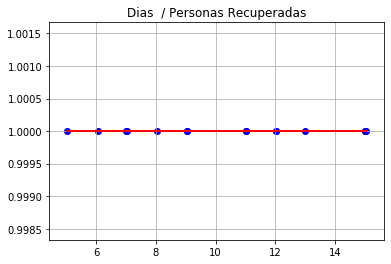

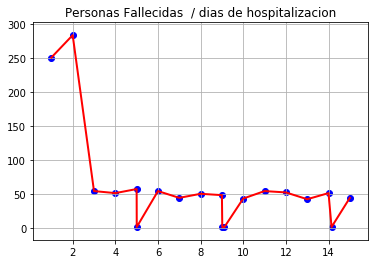

In [6]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
HOSPITALES = 1
CAMA_HOSPITAL = 96
CONSULTORIOS = 32
INFECTADOS_ACTULES = 608
##El valor de la tasa de crecimiento es la media de los nuevos casos presentados en SANTA ELENA
TASA_CRECIMIENTO = 52
TIEMPO_CONSULTA = 0.0069 #Tiempo en minutos, 10 minutos
DIAS_INTERNADO = 10 #Tiempo en dias
DIAS_SIMULACION = 16 #Tiempo en dias

#Diccionario para almacenar los resultados
persona_recuperadas={}
persona_fallecidas={}
tiempo_consulta=[]
tiempo_atender=[]
paciente_fallece_no_atencion=[]
total_atendidos=[]

class Hospital(object):
    #constructor
    def __init__(self, env, numero_camas,numero_consultorios, name):
            self.env = env
            self.numero_camas = numero_camas
            self.numero_consultorios=numero_consultorios
            self.camas = simpy.Resource(env, numero_camas)
            self.consultorios=simpy.Resource(env, numero_consultorios)
            self.name = name
            
    def triaje(self,paciente):
        #El tiempo esta en minutos, estara entre 5 y 20 minutos
        tiempo_en_consulta=random.uniform(TIEMPO_CONSULTA-0.0035, TIEMPO_CONSULTA+0.0069)
        yield self.env.timeout(tiempo_en_consulta)
        print('El paciente ingresa a consulta en', int(round((tiempo_en_consulta*1440),2)), 'minutos')
        tiempo_consulta.append(tiempo_en_consulta)
        
    def asignar_cama_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+10))
        print("El paciente", paciente, "ha sido internado luego de ", int(self.env.now), 'dias')

def llegada_paciente(env, hospital, paciente):
    llegada = env.now
    with hospital.consultorios.request() as consultorio:
        tiempo_espera_consulta=random.randint(1,2)
        tiempo_atender.append(tiempo_espera_consulta)
        requerimiento2 = yield consultorio | env.timeout(tiempo_espera_consulta)
        esperando = env.now - llegada
        if consultorio in requerimiento2:
            print("Al paciente", paciente, " se le asigna una CAMA para ser tratado")
            yield env.process(hospital.triaje(paciente))
            estado_paciente = random.randint(1,100)
            total_atendidos.append(1)
            if(estado_paciente < 40):
                with hospital.camas.request() as cama:
                    llegada_cama = env.now
                    dias_espera_cama = random.randint(1,2) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_espera_cama) #Asignar un tiempo de espera
                    espera_cama = env.now - llegada_cama
                    if cama in requerimiento:
                        print("Al paciente", paciente, " se le asigna una CAMA ", " hospital " , hospital.name)
                        yield env.process(hospital.asignar_cama_paciente(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        else:
                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
                    else:
                        print("El paciente " , paciente, " esperó ", espera_cama , " dia(s) y fallece por falta de cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
            else :
                print("El paciente",paciente, "no ha sido diagnosticado con COVID-19")
        else:
            print("El paciente " , paciente, "esperó", esperando , "día(s) y fallece, por falta de atención")
            paciente_fallece_no_atencion.append(1)
            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1

def ejecutar(env, tasa_crecimiento, contagiados):
    hospital = Hospital(env, CAMA_HOSPITAL, CONSULTORIOS, "Liborio Panchana Sotomayor")
    for i in range(contagiados):
        asignar_hospital(env, hospital, i)
    paciente = contagiados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hospital_existente = 1
    if (hospital_existente == 1):
        print("Llega un nuevo paciente", paciente)
        
        env.process(llegada_paciente(env, hospital, paciente))

print("Simulacion diagnostico y atencion de pacientes por COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS_ACTULES))
env.run(until=DIAS_SIMULACION)

print('\n')
print("Resultados pacientes :")
print("Recuperados: ")
print(persona_recuperadas)
print("Fallecidos: ")
print(persona_fallecidas)

datos=sorted(persona_recuperadas.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias  / Personas Recuperadas")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

In [7]:
promedio_espera_sala=sum(tiempo_consulta)/len(tiempo_consulta)
print("Tiempo de espera para entrar a triaje es de ",round(promedio_espera_sala*1440,2),'minutos')
promedio_atencion=sum(tiempo_atender)/len(tiempo_atender)
print('Tiempo promedio de espera para realizar la atención desde 0 en',round(promedio_atencion*24,2),'horas')
print("El número de personas atendidas en 16 días es de", sum(total_atendidos))
print("Total de pacientes que fallecieron por falta de atencion", sum(paciente_fallece_no_atencion))

Tiempo de espera para entrar a triaje es de  13.17 minutos
Tiempo promedio de espera para realizar la atención desde 0 en 36.12 horas
El número de personas atendidas en 16 días es de 141
Total de pacientes que fallecieron por falta de atencion 1179


## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 